# Note on titanic binary classification project

**Objective**: Predict the survival of passengers on the Titanic using sklearn models

https://www.kaggle.com/c/titanic/data


## ** Step 1 **: Load libraries

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

%matplotlib inline

## ** Step 2 **: Need to load data set from a csv file. 

Numpy's genfromtxt can be used, however, because ',' is present in string, use pandas's read_csv instead.

In [2]:
#load data sets
data_set = pd.read_csv('data/train.csv', delimiter=',', quotechar='"')
test_set = pd.read_csv('data/test.csv', delimiter=',', quotechar='"')

In [3]:
#have a look at the training data
data_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Step 3: Look at data and replace missing values

In [4]:
# show missing data
print('Missing data in each feature in training set:\n', data_set.isnull().sum())

Missing data in each feature in training set:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# replacing missing values in 'Age' with median age
median_age = data_set['Age'].median()
data_set['Age'].fillna(median_age, inplace=True)
print('Median age =', median_age)

Median age = 28.0


In [6]:
# replace 2 missing embarked values by first finding the most frequent value
port = data_set['Embarked'].value_counts().idxmax()
data_set['Embarked'].fillna(port, inplace=True)

# Check data_set again, should only have 'Cabin' missing
data_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [7]:
#check missing values in test set
print('Missing data in each feature in test set:\n', test_set.isnull().sum())

Missing data in each feature in test set:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [8]:
# replace mssing values in 'Age' with median age
median_age = test_set['Age'].median()
test_set['Age'].fillna(median_age, inplace=True)
print('Median age in test set =', median_age)

#replace missing fare value with mean value
test_set['Fare'].fillna(test_set['Fare'].mean(), inplace=True)

# check test_set missing values again
test_set.isnull().sum()

Median age in test set = 27.0


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Step 4: Data exploratory analysis

Have a look at different features to decide what's important

In [9]:
n_train = data_set.shape[0]
n_test = test_set.shape[0]
n_x = data_set.shape[1]

print("Number of data examples: n_train = " + str(n_train))
print("Number of testing examples: n_test = " + str(n_test))
print("Number of all features for each example: n_x = " + str(n_x))

Number of data examples: n_train = 891
Number of testing examples: n_test = 418
Number of all features for each example: n_x = 12


In [10]:
# Different features in the data set
data_set.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Output labels
y = data_set['Survived']

### Analyze input features
* `PassengerId` does not carry any meaningful information and can be ignored
* `Name`: maybe titles can be analyze for information on status but for now can be ignored
* `Embarked` gives the Port of Embarkation with C = Cherbourg, Q = Queenstown, S = Southampton. Can we perhaps safely ignore this feature?? Let's have a look below.
* `Cabin` may be useful, but a lot of data are missing and cannot be meaningfully filled in 
* `Ticket` does not appear to carry meaningful information and will be ignored for now
* `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, and `Fare` are included for now.

In [12]:
data_set.groupby(['Ticket'])['PassengerId'].nunique()

Ticket
110152               3
110413               3
110465               2
110564               1
110813               1
111240               1
111320               1
111361               2
111369               1
111426               1
111427               1
111428               1
112050               1
112052               1
112053               1
112058               1
112059               1
112277               1
112379               1
113028               1
113043               1
113050               1
113051               1
113055               1
113056               1
113059               1
113501               1
113503               1
113505               2
113509               1
                    ..
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON/O 2. 3101274    1
STON/O 2. 3101275    1
STON/O 2. 3101280    1
STON/O 2. 3101285    1
STON/O 2. 3101286    1
STON/O 2. 3101288    1
STON

For the time beging I don't think I can draw useful information from `ticket`.

In [13]:
data_set.groupby(['Embarked'])['PassengerId'].nunique()

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64

In [14]:
data_set[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


It appears that a large portion of passengers departed from Southampton, and a significant fraction of people departing from Cherbourg survived. Perhaps I should include this information

In [15]:
# Extract some starting features for input X
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X_temp = data_set[features]

# Assign values to gender and embarked
X_temp['Sex'] = data_set['Sex'].map({'male' : 1, 'female' : 0})
X_temp['Embarked'] = data_set['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

# print X
X_temp.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


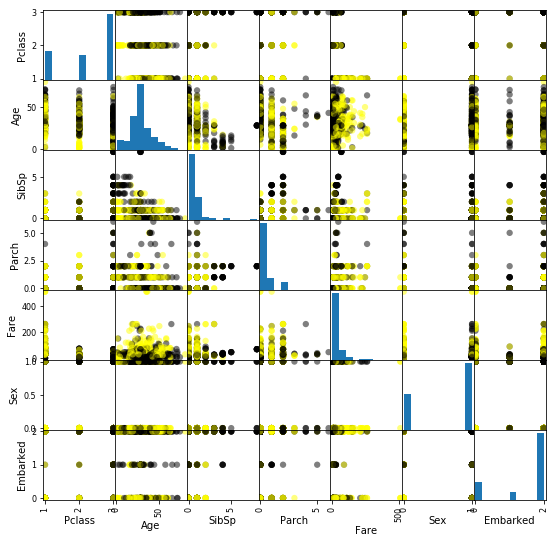

In [16]:
# plotting a scatter matrixb
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_temp, c= y, marker = 'o', s=40, hist_kwds={'bins':10}, figsize=(9,9), cmap=cmap)

It appears that there is a strong correlation between Sex and survival. Women tend to survive.
* (Sex, Fare): Women with higher fares seem to have a higher survival rate than women with lower fares. Men with the highest fares seemed to survive.
* (Sex, Parch): Women with fewer children/parents have higher survival rate. No clear trend for men.
* (Sex, SibSp): No clear trend for both men and women
* (Sex, Age): Not very clear trend for both men and women
* (Sex, Pclass): Women in 1st and 2nd class survived while women in 3rd class didn't. No clear trend for men.
* (Sex, Embarked): It appears that for both genders, but more so for women, people embarking at Cherbourg had a better chance of survival.

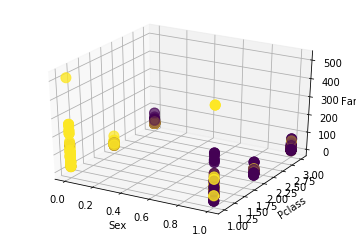

In [17]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_temp['Sex'], X_temp['Pclass'], X_temp['Fare'], c = y, marker = 'o', s=100)
ax.set_xlabel('Sex')
ax.set_ylabel('Pclass')
ax.set_zlabel('Fare')
plt.show()

In [18]:
# survival rate of female vs. male
data_set[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
# survival rate with respect to Pclass
data_set[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
# survival rate with respect to SibSp
data_set[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [21]:
# survival rate with respect to Parch
data_set[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


## Step 5: Prepare train, dev, and test sets

In [22]:
# Extract features for input X taking into account analysis above, add Sex and Embarked
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

X = data_set[features]

# Label Sex and Embarked
X['Sex'] = data_set['Sex'].map({'male' : 1, 'female' : 0})
X['Embarked'] = data_set['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

n_features = X.shape[1]
print('Number of features to train = ', n_features)

# print X
X.head()

Number of features to train =  7


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,22.0,1,0,7.2500,1,2
1,1,38.0,1,0,71.2833,0,0
2,3,26.0,0,0,7.9250,0,2
3,1,35.0,1,0,53.1000,0,2
4,3,35.0,0,0,8.0500,1,2


In [23]:
#Extract the same features for X_test and label gender
X_test = test_set[features]
X_test['Sex'] = test_set['Sex'].map({'male' : 1, 'female' : 0})
X_test['Embarked'] = test_set['Embarked'].map({'C' : 0, 'Q' : 1, 'S' : 2})

X_test.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,0,2
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,1,2
4,3,22.0,1,1,12.2875,0,2


### Feature normalization

This step is important for most machine learning algorithms.

In [24]:
#normalizing input features for both data sets using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Split data set into training and cross validation (development) sets

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_dev, y_train, y_dev = train_test_split(X, y, random_state=0)

print('Number of training examples: ', X_train.shape[0])
print('Number of examples for cross validation: ', X_dev.shape[0])

Number of training examples:  668
Number of examples for cross validation:  223


## Step 6: Build a model

Here I tried quite a number of models that are builtin already in sklearn and very easily executable given the previously prepared train and dev sets.

Recall some of the metrics used to evaluate the accuracy of a model:

* Accuracy = TP + TN / (TP + TN + FP + FN)
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
* F1 = 2 * Precision * Recall / (Precision + Recall) 

In [26]:
# threshhold for predictions
thresh = 0.5

In [27]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)

#score for predictions on the dev set
print('Score for predictions on the training set using KNN: ', knn.score(X_train, y_train))
score = knn.score(X_dev, y_dev)
print('Score for predictions on the dev set using KNN: ', score)

y_pred = knn.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('k-Nearest Neighbor Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

Score for predictions on the training set using KNN:  0.8577844311377245
Score for predictions on the dev set using KNN:  0.8116591928251121
k-Nearest Neighbor Classifier
 [[129  32]
 [ 10  52]]
Accuracy: 0.81
Precision: 0.84
Recall: 0.62
F1: 0.71


In [28]:
# logistic regression
from sklearn.linear_model import LogisticRegression

losreg = LogisticRegression(C = 100, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
print('Score for predictions on the training set: ', losreg.score(X_train, y_train))
print('Score for predictions on the dev set: ', losreg.score(X_dev, y_dev))

y_pred = losreg.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Logistic Regression Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

Score for predictions on the training set:  0.8038922155688623
Score for predictions on the dev set:  0.7937219730941704
Logistic Regression Classifier
 [[116  23]
 [ 23  61]]
Accuracy: 0.79
Precision: 0.73
Recall: 0.73
F1: 0.73


In [29]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print('Score for predictions on the training set: ', tree.score(X_train, y_train))
print('Score for predictions on the dev set: ', tree.score(X_dev, y_dev))

y_pred = tree.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

Score for predictions on the training set:  0.9805389221556886
Score for predictions on the dev set:  0.7802690582959642
Decision Tree  Classifier
 [[115  25]
 [ 24  59]]
Accuracy: 0.78
Precision: 0.71
Recall: 0.70
F1: 0.71


In [30]:
# random forest
from sklearn.ensemble import RandomForestClassifier

randforest = RandomForestClassifier(n_estimators = 100, max_features = 2, random_state=0).fit(X_train, y_train)
print('Score for predictions on the training set: ', randforest.score(X_train, y_train))
print('Score for predictions on the dev set: ', randforest.score(X_dev, y_dev))

y_pred = randforest.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Random Forest Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

Score for predictions on the training set:  0.9805389221556886
Score for predictions on the dev set:  0.8430493273542601
Random Forest Classifier
 [[123  19]
 [ 16  65]]
Accuracy: 0.84
Precision: 0.80
Recall: 0.77
F1: 0.79


In [31]:
# Multi-layer perceptron
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=[10, 100], solver='lbfgs', alpha = 1, random_state=0).fit(X_train, y_train)
print('Score for predictions on the training set: ', nn.score(X_train, y_train))
print('Score for predictions on the dev set: ', nn.score(X_dev, y_dev))

y_pred = nn.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

Score for predictions on the training set:  0.8413173652694611
Score for predictions on the dev set:  0.8161434977578476
Decision Tree  Classifier
 [[126  28]
 [ 13  56]]
Accuracy: 0.82
Precision: 0.81
Recall: 0.67
F1: 0.73


In [32]:
# Gradient boosted decision tree
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=5).fit(X_train, y_train)
print('Score for predictions on the training set: ', gbc.score(X_train, y_train))
print('Score for predictions on the dev set: ', gbc.score(X_dev, y_dev))

y_pred = gbc.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

Score for predictions on the training set:  0.8817365269461078
Score for predictions on the dev set:  0.8385650224215246
Decision Tree  Classifier
 [[129  26]
 [ 10  58]]
Accuracy: 0.84
Precision: 0.85
Recall: 0.69
F1: 0.76


In [33]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
print('Score for predictions on the training set: ', gnb.score(X_train, y_train))
print('Score for predictions on the dev set: ', gnb.score(X_dev, y_dev))

y_pred = gnb.predict(X_dev)
confusion = confusion_matrix(y_pred, y_dev)
print('Decision Tree  Classifier\n', confusion)

print('Accuracy: {:.2f}'.format(accuracy_score(y_dev, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_dev, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_dev, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_dev, y_pred)))

Score for predictions on the training set:  0.7919161676646707
Score for predictions on the dev set:  0.7802690582959642
Decision Tree  Classifier
 [[109  19]
 [ 30  65]]
Accuracy: 0.78
Precision: 0.68
Recall: 0.77
F1: 0.73


## Step 7: Error evaluation

So having looked at the prediction scores from different models above, I decided to just go with random forest. Althought it appears to overfit the data, I thought the score on the dev set was an improvement compared to what I got before on the actual Kaggle test set (0.77). However, it turns out that my prediction score using RF was worse than before at 0.74. It clearly seems to indicate that a more serious model evaluation and feature tuning is necessary.

[tobedone]

## Step 8: Make final predictions on the unseen test set 

Let's say we have finally come to choose a model and are ready to make our predictions for submission. 

In [34]:
# Make predictions on unseen data using SVM
y_pred = randforest.predict(X_test)
#y_pred = np.where(y_pred >= thresh, 1, 0)
y = pd.DataFrame(data=y_pred, columns=['Survived'])
y.insert(loc=0, column='PassengerId', value=test_set['PassengerId'])

In [35]:
y.to_csv('data/submission_AR.csv', index=False)

In [36]:
print('Number of people who survived: ', y['Survived'].sum())

Number of people who survived:  159
